<a href="https://colab.research.google.com/github/chaerui7967/stock_predict_news_and_youtube/blob/master/%EC%8B%9C%EA%B3%84%EC%97%B4_Arima_prophet_%EB%B9%84%EA%B5%90_%ED%98%84%EB%8C%80%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ARIMA

## 라이브러리 설치

In [1]:
!pip install finance-datareader
!pip install pykrx

     |████████████████████████████████| 81 kB 1.2 MB/s 
     |████████████████████████████████| 60 kB 5.9 MB/s 
     |████████████████████████████████| 251 kB 39.9 MB/s 


## colab 이용 시 한글 폰트 설정

In [1]:
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

# 버전과 위치정보
print(mpl.__version__)
print(mpl.__file__)
print(mpl.get_configdir())
print(mpl.get_cachedir())

3.2.2
/usr/local/lib/python3.7/dist-packages/matplotlib/__init__.py
/root/.config/matplotlib
/root/.cache/matplotlib


In [2]:
# 설치된 폰트 확인
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}") # 나눔고딕 없음

sys_font number: 48
['/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf', '/usr/share/fonts/truetype/liberation/LiberationMon

In [4]:
# 나눔고딕 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 148492 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [3]:
# 설치확인
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [36]:
# 나눔 폰트 설치경로
nanum_font

['/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nan

In [10]:
# 현재 설정되어 있는 폰트 사이즈와 글꼴
import matplotlib.pyplot as plt
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능
        
current_font()

Python 3.7.11
설정 폰트 글꼴: ['NanumGothic'], 설정 폰트 사이즈: 10.0


In [7]:
fm._rebuild()

In [34]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Linux':
    path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system...')

In [9]:
print('# 설정되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] ) 
print('# 설정되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )
# 커널 다시시작

# 설정되어있는 폰트 사이즈
10.0
# 설정되어있는 폰트 글꼴
['NanumGothic']


## 데이터 로드

In [11]:
def money_sur(stock_name, start, end):

  # 라이브러리를 찾음... 한방에 나옴...
    start_date = start
    end_date = end
    sample_code = stock_name

    dataset = fdr.DataReader(sample_code, start = start_date, end = end_date )
    dataset = dataset.reset_index()
    df = stock.get_market_fundamental_by_date(fromdate=start_date, todate=end_date, ticker=sample_code)
    df = df.reset_index()
    df.columns = ['Date','BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS']
    data = pd.merge(dataset, df, on='Date')

    return data

In [12]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
# 주식가격 로딩
import FinanceDataReader as fdr
from pykrx import stock

# 삼성전자 2018년 이후
end_date = datetime.datetime.now().strftime("%Y%m%d")
hu_df = money_sur('005380', start = '20180101', end = end_date)

hu_df

,Date,Open,High,Low,Close,Volume,Change,BPS,PER,PBR,EPS,DIV,DPS
0,2018-01-02,150500,153000,149000,149500,731763,-0.041667,235358,7.43,0.64,20118,2.68,4000
1,2018-01-03,149000,151000,149000,150500,450874,0.006689,235358,7.48,0.64,20118,2.66,4000
2,2018-01-04,150500,151000,146000,146500,931558,-0.026578,235358,7.28,0.62,20118,2.73,4000
3,2018-01-05,146000,149000,145500,149000,463695,0.017065,235358,7.41,0.63,20118,2.68,4000
4,2018-01-08,148500,151000,147500,151000,482619,0.013423,235358,7.51,0.64,20118,2.65,4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,2021-09-10,208500,209500,204000,206500,678308,-0.009592,250888,37.86,0.82,5454,1.45,3000
912,2021-09-13,206500,206500,204000,205000,590609,-0.007264,250888,37.59,0.82,5454,1.46,3000
913,2021-09-14,206500,211500,206000,209000,721080,0.019512,250888,38.32,0.83,5454,1.44,3000
914,2021-09-15,208000,211500,208000,209500,472855,0.002392,250888,38.41,0.84,5454,1.43,3000


## ARIMA 모수 설정

In [13]:
df1 = hu_df[['Date','Close']]
df1

,Date,Close
0,2018-01-02,149500
1,2018-01-03,150500
2,2018-01-04,146500
3,2018-01-05,149000
4,2018-01-08,151000
...,...,...
911,2021-09-10,206500
912,2021-09-13,205000
913,2021-09-14,209000
914,2021-09-15,209500


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


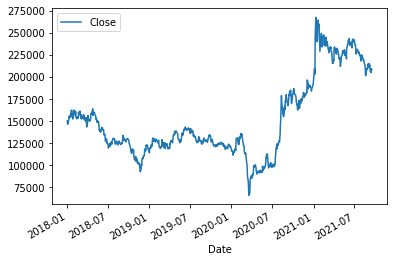

In [14]:
df1.plot('Date','Close')

In [15]:
df1.columns = ['Date', 'Price']

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


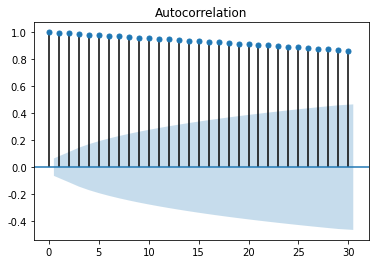

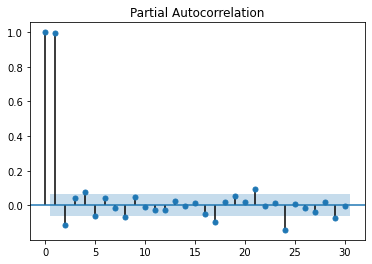

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df1.Price)
plot_pacf(df1.Price)
plt.show()

ACF를 보면 완만하지만 꾸준히 줄어드는 것으로 보인다. 또한 PACF는 1의 Time lag에서 약 0.99를 보이고 이후에 급격히 감소한다.

In [17]:
# 시계열 정상성 검정 Augmented Dickey-Fuller Test
# 비정상성 확인

from statsmodels.tsa.stattools import adfuller
result = adfuller(df1['Price'])

print(f'ADF statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF statistic: -1.0351348592016159
p-value: 0.7402350051232376


1차 차분 및 로그변환

In [18]:
x = df1['Price'].values
x = np.log(x)

diff = x[1:] - x[:-1] # 차분

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


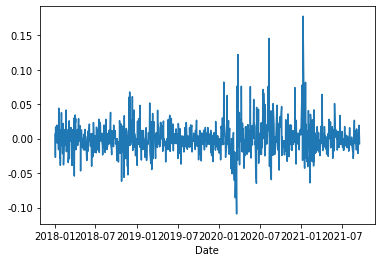

In [19]:
sns.lineplot(df1.iloc[1:, 0], diff)

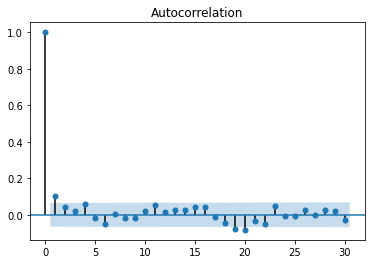

In [20]:
fig = plot_acf(diff)

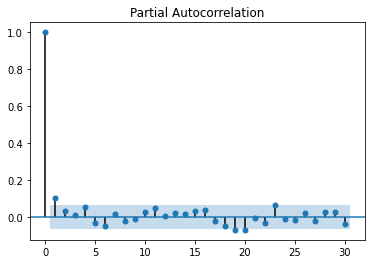

In [21]:
fig = plot_pacf(diff)

In [22]:
result_r = adfuller(diff)

print(f'ADF statistic: {result_r[0]}')
print(f'p-value: {result_r[1]}')  # 1차 차분만으로도 유효한 결과가 나옴

ADF statistic: -27.29717758362194
p-value: 0.0


## Arima model

In [23]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
# 1,0,1 // 1,1,1 // 1,2,1 // 1,2,2 // 2,2,2 // .... 여러가지 차수를 지정해봤을 때 2,1,2가 최적임
# (AR = 2, 차분 =1, MA=2) 파라미터로 ARIMA 모델을 학습한다.
model = ARIMA(df1.Price.values, order = (2,1,2))
model_fit = model.fit(trend = 'c', full_output = True, disp = True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  915
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -8774.083
Method:                       css-mle   S.D. of innovations           3533.863
Date:                Thu, 16 Sep 2021   AIC                          17560.166
Time:                        06:25:38   BIC                          17589.080
Sample:                             1   HQIC                         17571.203
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.2572    123.875      0.527      0.598    -177.533     308.047
ar.L1.D.y     -0.8415      0.074    -11.342      0.000      -0.987      -0.696
ar.L2.D.y     -0.7796      0.083     -9.362      0.0

In [24]:
# const 가 유의하지 않으므로 trend를 nc로해서 다시 모델 적합
model = ARIMA(df1.Price.values, order = (2,1,2))
model_fit = model.fit(trend = 'nc', full_output = True, disp = True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  915
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -8774.219
Method:                       css-mle   S.D. of innovations           3534.388
Date:                Thu, 16 Sep 2021   AIC                          17558.438
Time:                        06:25:39   BIC                          17582.533
Sample:                             1   HQIC                         17567.635
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.y     -0.8415      0.074    -11.344      0.000      -0.987      -0.696
ar.L2.D.y     -0.7792      0.084     -9.324      0.000      -0.943      -0.615
ma.L1.D.y      0.9419      0.067     13.991      0.0

In [25]:
# 학습, 테스트 데이터 분리
train = df1[:-10]
test = df1[-10:]

In [26]:
model = ARIMA(train.Price.values, order = (2,1,2))
model_fit = model.fit(trend = 'nc', full_output = True, disp = True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  905
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -8680.707
Method:                       css-mle   S.D. of innovations           3543.694
Date:                Thu, 16 Sep 2021   AIC                          17371.415
Time:                        06:25:39   BIC                          17395.454
Sample:                             1   HQIC                         17380.596
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.y     -0.8374      0.075    -11.222      0.000      -0.984      -0.691
ar.L2.D.y     -0.7764      0.083     -9.346      0.000      -0.939      -0.614
ma.L1.D.y      0.9396      0.068     13.884      0.0

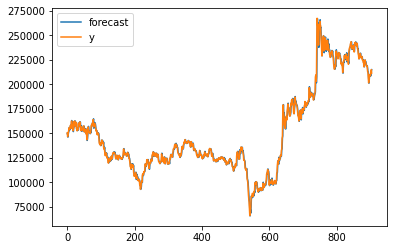

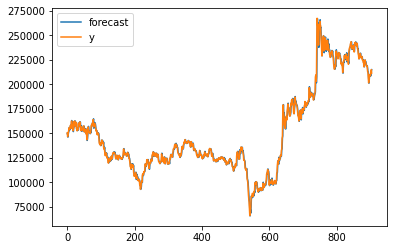

In [27]:
model_fit.plot_predict()

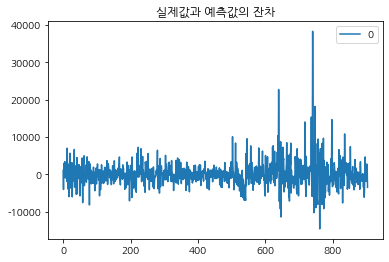

In [35]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title = "실제값과 예측값의 잔차")

In [29]:
fore = model_fit.forecast(steps=10) # 10일 예측
print(fore)

(array([210758.80305905, 211163.31314645, 211400.07062328, 210887.75243714,
       211132.92324726, 211325.39953912, 210973.87392935, 211118.78463013,
       211270.37256258, 211030.92855905]), array([ 3543.69365467,  5273.91081949,  6507.4048775 ,  7441.38907934,
        8379.26876654,  9203.24123239,  9902.90821138, 10613.19346726,
       11272.60410268, 11860.95080029]), array([[203813.29112365, 217704.31499446],
       [200826.63788258, 221499.98841031],
       [198645.79143056, 224154.34981599],
       [196302.89784669, 225472.6070276 ],
       [194709.85824807, 227555.98824646],
       [193287.37818259, 229363.42089564],
       [191564.53049285, 230383.21736586],
       [190317.30767335, 231920.26158691],
       [189176.47450934, 233364.27061581],
       [187783.89216808, 234277.96495002]]))


## Arima 결과

In [36]:
# 마지막 10일의 예측 데이터
pred_arima_y = fore[0].tolist()

# 실제 10일의 데이터 
test_y = test.Price.values

# 신뢰구간
# 마지막 10일의 예측 데이터 최소값
pred_y_lower = []
# 마지막 10일의 예측 데이터 최대값
pred_y_upper = []

for lower_upper in fore[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

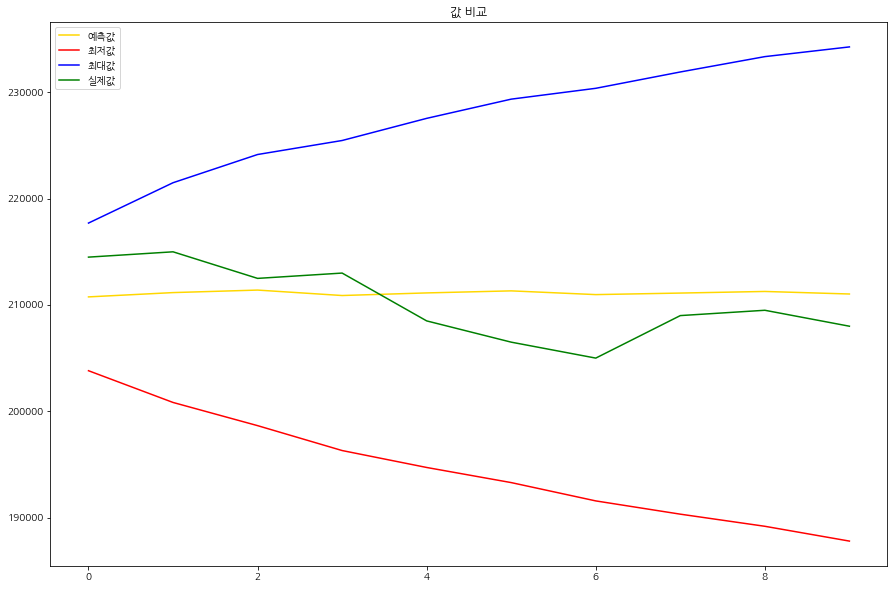

In [37]:
plt.figure(figsize=(15, 10))

# 모델이 예측한 가격 그래프
plt.plot(pred_arima_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

plt.legend(['예측값', '최저값','최대값','실제값'])
plt.title("값 비교")
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

rmse_arima = sqrt(mean_squared_error(pred_arima_y, test_y))
print(rmse_arima)

3422.018198006718


# Prophet

## 데이터 로드

In [39]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
# 주식가격 로딩
import FinanceDataReader as fdr
from pykrx import stock

# 삼성전자 2018년 이후
end_date = datetime.datetime.now().strftime("%Y%m%d")
hu_df = money_sur('005380', start = '20180101', end = end_date)

hu_df

,Date,Open,High,Low,Close,Volume,Change,BPS,PER,PBR,EPS,DIV,DPS
0,2018-01-02,150500,153000,149000,149500,731763,-0.041667,235358,7.43,0.64,20118,2.68,4000
1,2018-01-03,149000,151000,149000,150500,450874,0.006689,235358,7.48,0.64,20118,2.66,4000
2,2018-01-04,150500,151000,146000,146500,931558,-0.026578,235358,7.28,0.62,20118,2.73,4000
3,2018-01-05,146000,149000,145500,149000,463695,0.017065,235358,7.41,0.63,20118,2.68,4000
4,2018-01-08,148500,151000,147500,151000,482619,0.013423,235358,7.51,0.64,20118,2.65,4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,2021-09-10,208500,209500,204000,206500,678308,-0.009592,250888,37.86,0.82,5454,1.45,3000
912,2021-09-13,206500,206500,204000,205000,590609,-0.007264,250888,37.59,0.82,5454,1.46,3000
913,2021-09-14,206500,211500,206000,209000,721080,0.019512,250888,38.32,0.83,5454,1.44,3000
914,2021-09-15,208000,211500,208000,209500,472855,0.002392,250888,38.41,0.84,5454,1.43,3000


## Prophet 모델 실습

- Prophet은 Additive 모델이라는 모델링 방법에 기반한 시계열 예측모델로, 시계열 데이터의 트렌드성(연간/월간/일간)을 예측하는 것에 초점이 맞추어져 있다.
- fbprophet 라이브러리를 사용하기 위해서는 데이터 프레임의 피쳐를 'ds'와 'y'로 변경해야 한다. 
  - sesonality_mode: 연간, 월간, 주간, 일간 등의 트렌드성을 반영하는 것을 의미하는 파라미터
    - Additive는 데이터의 진폭이 일정함을 의미하고, Multiplicative는 데이터의 진폭이 점점 증가하거나 감소하는 것을 뜻함
  - changepoint_prior_scale: 트렌드가 변경되는 문맥을 반영하는 파라미터. 수치가 높을수록 모델은 과적합에 가까워진다.

In [40]:
df1 = hu_df[['Date','Close']]
df1

,Date,Close
0,2018-01-02,149500
1,2018-01-03,150500
2,2018-01-04,146500
3,2018-01-05,149000
4,2018-01-08,151000
...,...,...
911,2021-09-10,206500
912,2021-09-13,205000
913,2021-09-14,209000
914,2021-09-15,209500


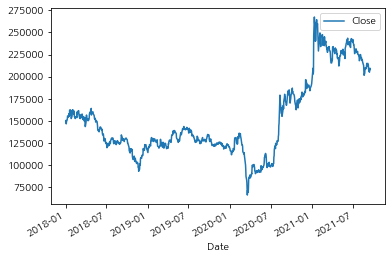

In [41]:
df1.plot('Date','Close')

In [42]:
df1.columns = ['ds', 'y']

In [43]:
# train, test
train = df1[:-10]
test = df1[-10:]

In [44]:
from fbprophet import Prophet

prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality=True, 
                 weekly_seasonality=True,
                 daily_seasonality=True,
                 changepoint_prior_scale=0.6)

prophet.fit(train)

In [45]:
# 10일단위로 예측값을 가져옴
future_data = prophet.make_future_dataframe(periods = 10, freq = 'd')
forecast_data = prophet.predict(future_data)
forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
906,2021-09-03,203631.191549,197125.663126,210583.178600
907,2021-09-04,175679.147343,169121.639038,182458.213022
908,2021-09-05,174858.845356,167308.002237,181202.085149
909,2021-09-06,201290.368697,194246.019658,208380.089855
910,2021-09-07,201007.025663,194665.224770,208062.306627
911,2021-09-08,200130.819503,193271.008331,207070.304789
912,2021-09-09,199144.189237,191847.069763,206474.698285
913,2021-09-10,198488.532812,191053.616416,205506.763135
914,2021-09-11,170923.272315,163023.116815,178322.614867
915,2021-09-12,170444.630376,163305.881732,177585.916240


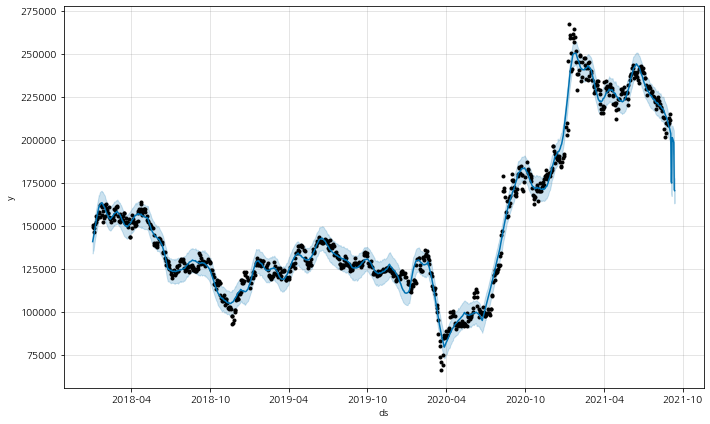

In [46]:
fig1 = prophet.plot(forecast_data)

그래프는 fbprophet에서 제공하는 트렌드 정보 시각화 그래프이다. 앞서 seasonality_mode 파라미터를 설정해놓은 경우에만 이 시각화가 가능

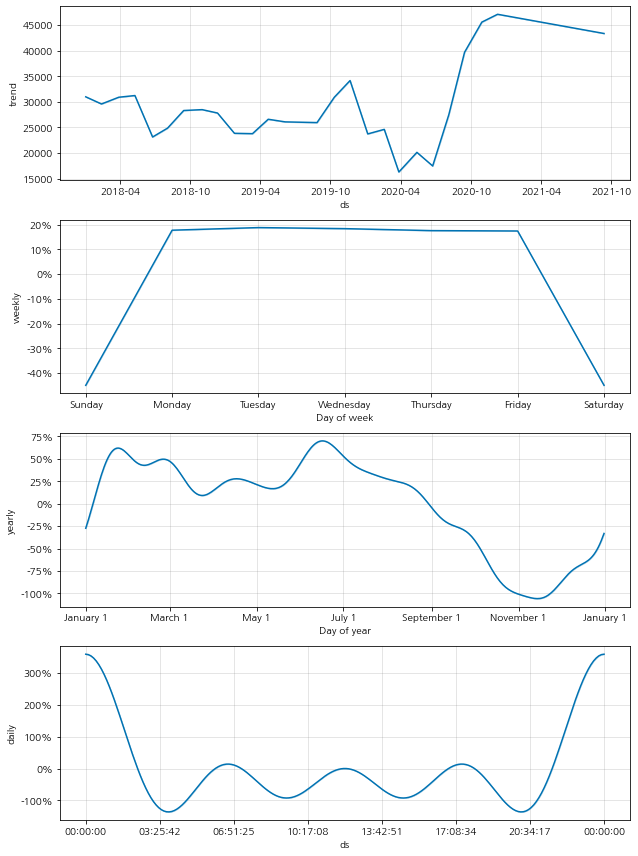

In [47]:
fig2 = prophet.plot_components(forecast_data)

## 결과

In [48]:
# test
test.y.values

array([214500, 215000, 212500, 213000, 208500, 206500, 205000, 209000,
       209500, 208000])

Text(0.5, 1.0, '값 비교')

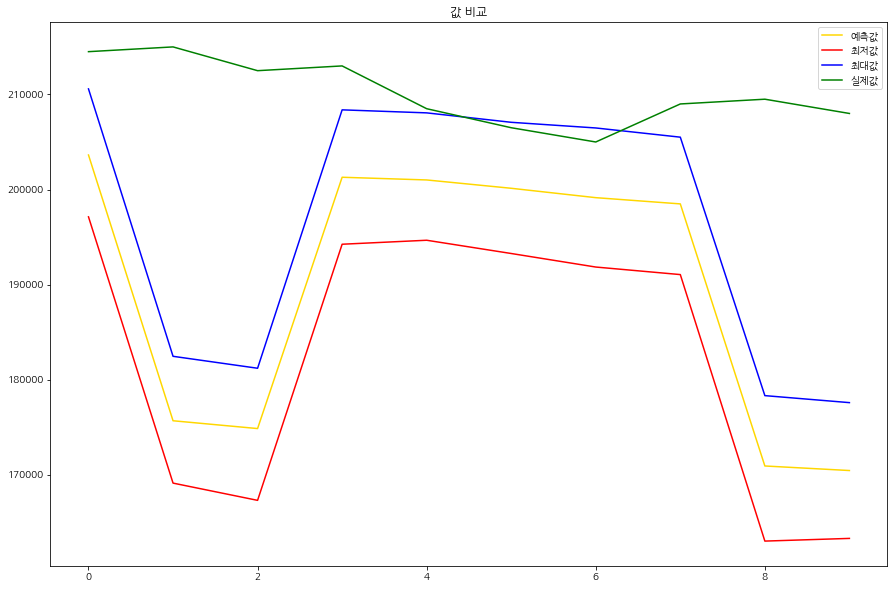

In [49]:
plt.figure(figsize=(15, 10))

# 마지막 10일의 예측 데이터
pred_fbprophet_y = forecast_data.yhat.values[-10:]

# 실제 10일의 데이터 
test_y = test.y.values

# 마지막 10일의 예측 데이터 최소값
pred_y_lower = forecast_data.yhat_lower.values[-10:]
# 마지막 10일의 예측 데이터 최대값
pred_y_upper = forecast_data.yhat_upper.values[-10:]

# 모델이 예측한 가격 그래프
plt.plot(pred_fbprophet_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

plt.legend(['예측값', '최저값','최대값','실제값'])
plt.title("값 비교")

In [50]:
pred_fbprophet_y

array([203631.19154939, 175679.14734307, 174858.84535555, 201290.36869674,
       201007.02566302, 200130.81950344, 199144.18923681, 198488.53281183,
       170923.27231484, 170444.63037553])

In [51]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

prophet_arima = sqrt(mean_squared_error(pred_fbprophet_y, test_y))
print(prophet_arima)

25215.659286067646


## 모델 비교

In [52]:
df = pd.DataFrame({'ARIMA 예측값':pred_arima_y,
                   'FBprophet 예측값':  pred_fbprophet_y,
                   '실제값':test_y})
df

,ARIMA 예측값,FBprophet 예측값,실제값
0,210758.803059,203631.191549,214500
1,211163.313146,175679.147343,215000
2,211400.070623,174858.845356,212500
3,210887.752437,201290.368697,213000
4,211132.923247,201007.025663,208500
5,211325.399539,200130.819503,206500
6,210973.873929,199144.189237,205000
7,211118.784630,198488.532812,209000
8,211270.372563,170923.272315,209500
9,211030.928559,170444.630376,208000


Text(0.5, 1.0, '값 비교')

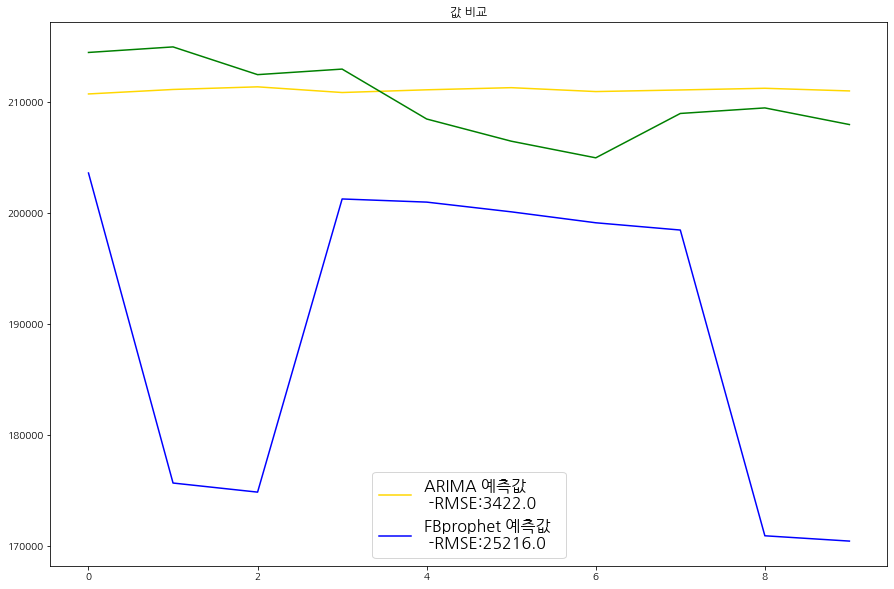

In [53]:
plt.figure(figsize=(15, 10))

# arima 모델의  rmse
rmse_arima = sqrt(mean_squared_error(pred_arima_y, test_y))

# fbprophet 모델의  rmse
rmse_fbprophet = sqrt(mean_squared_error(pred_fbprophet_y, test_y))

# 모델이 예측한 가격 그래프
plt.plot(df[['ARIMA 예측값']], color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(df[['FBprophet 예측값']], color = 'blue')


# 실제 가격 그래프
plt.plot(test_y, color = 'green')

plt.rc('legend', fontsize=16)
plt.legend(['ARIMA 예측값 \n -RMSE:' + str(round(rmse_arima,0)), 
            'FBprophet 예측값  \n -RMSE:' + str(round(rmse_fbprophet,0))])
plt.title("값 비교")